# Logistic Regression Project Exercise 

**GOAL is to create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# No null values. 
# All numeric values. No need for One Hot Encoding.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
df['target'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='target', ylabel='count'>

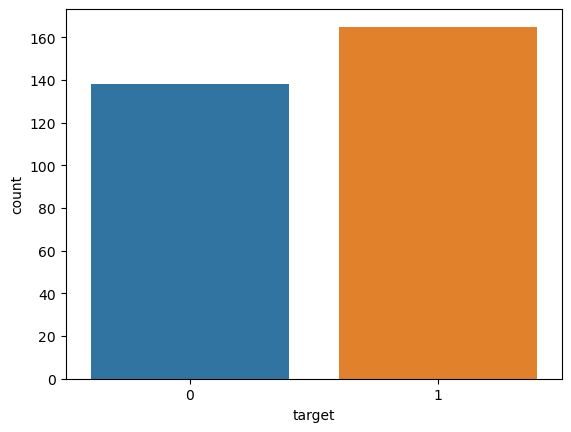

In [11]:
sns.countplot(x = df['target'])

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

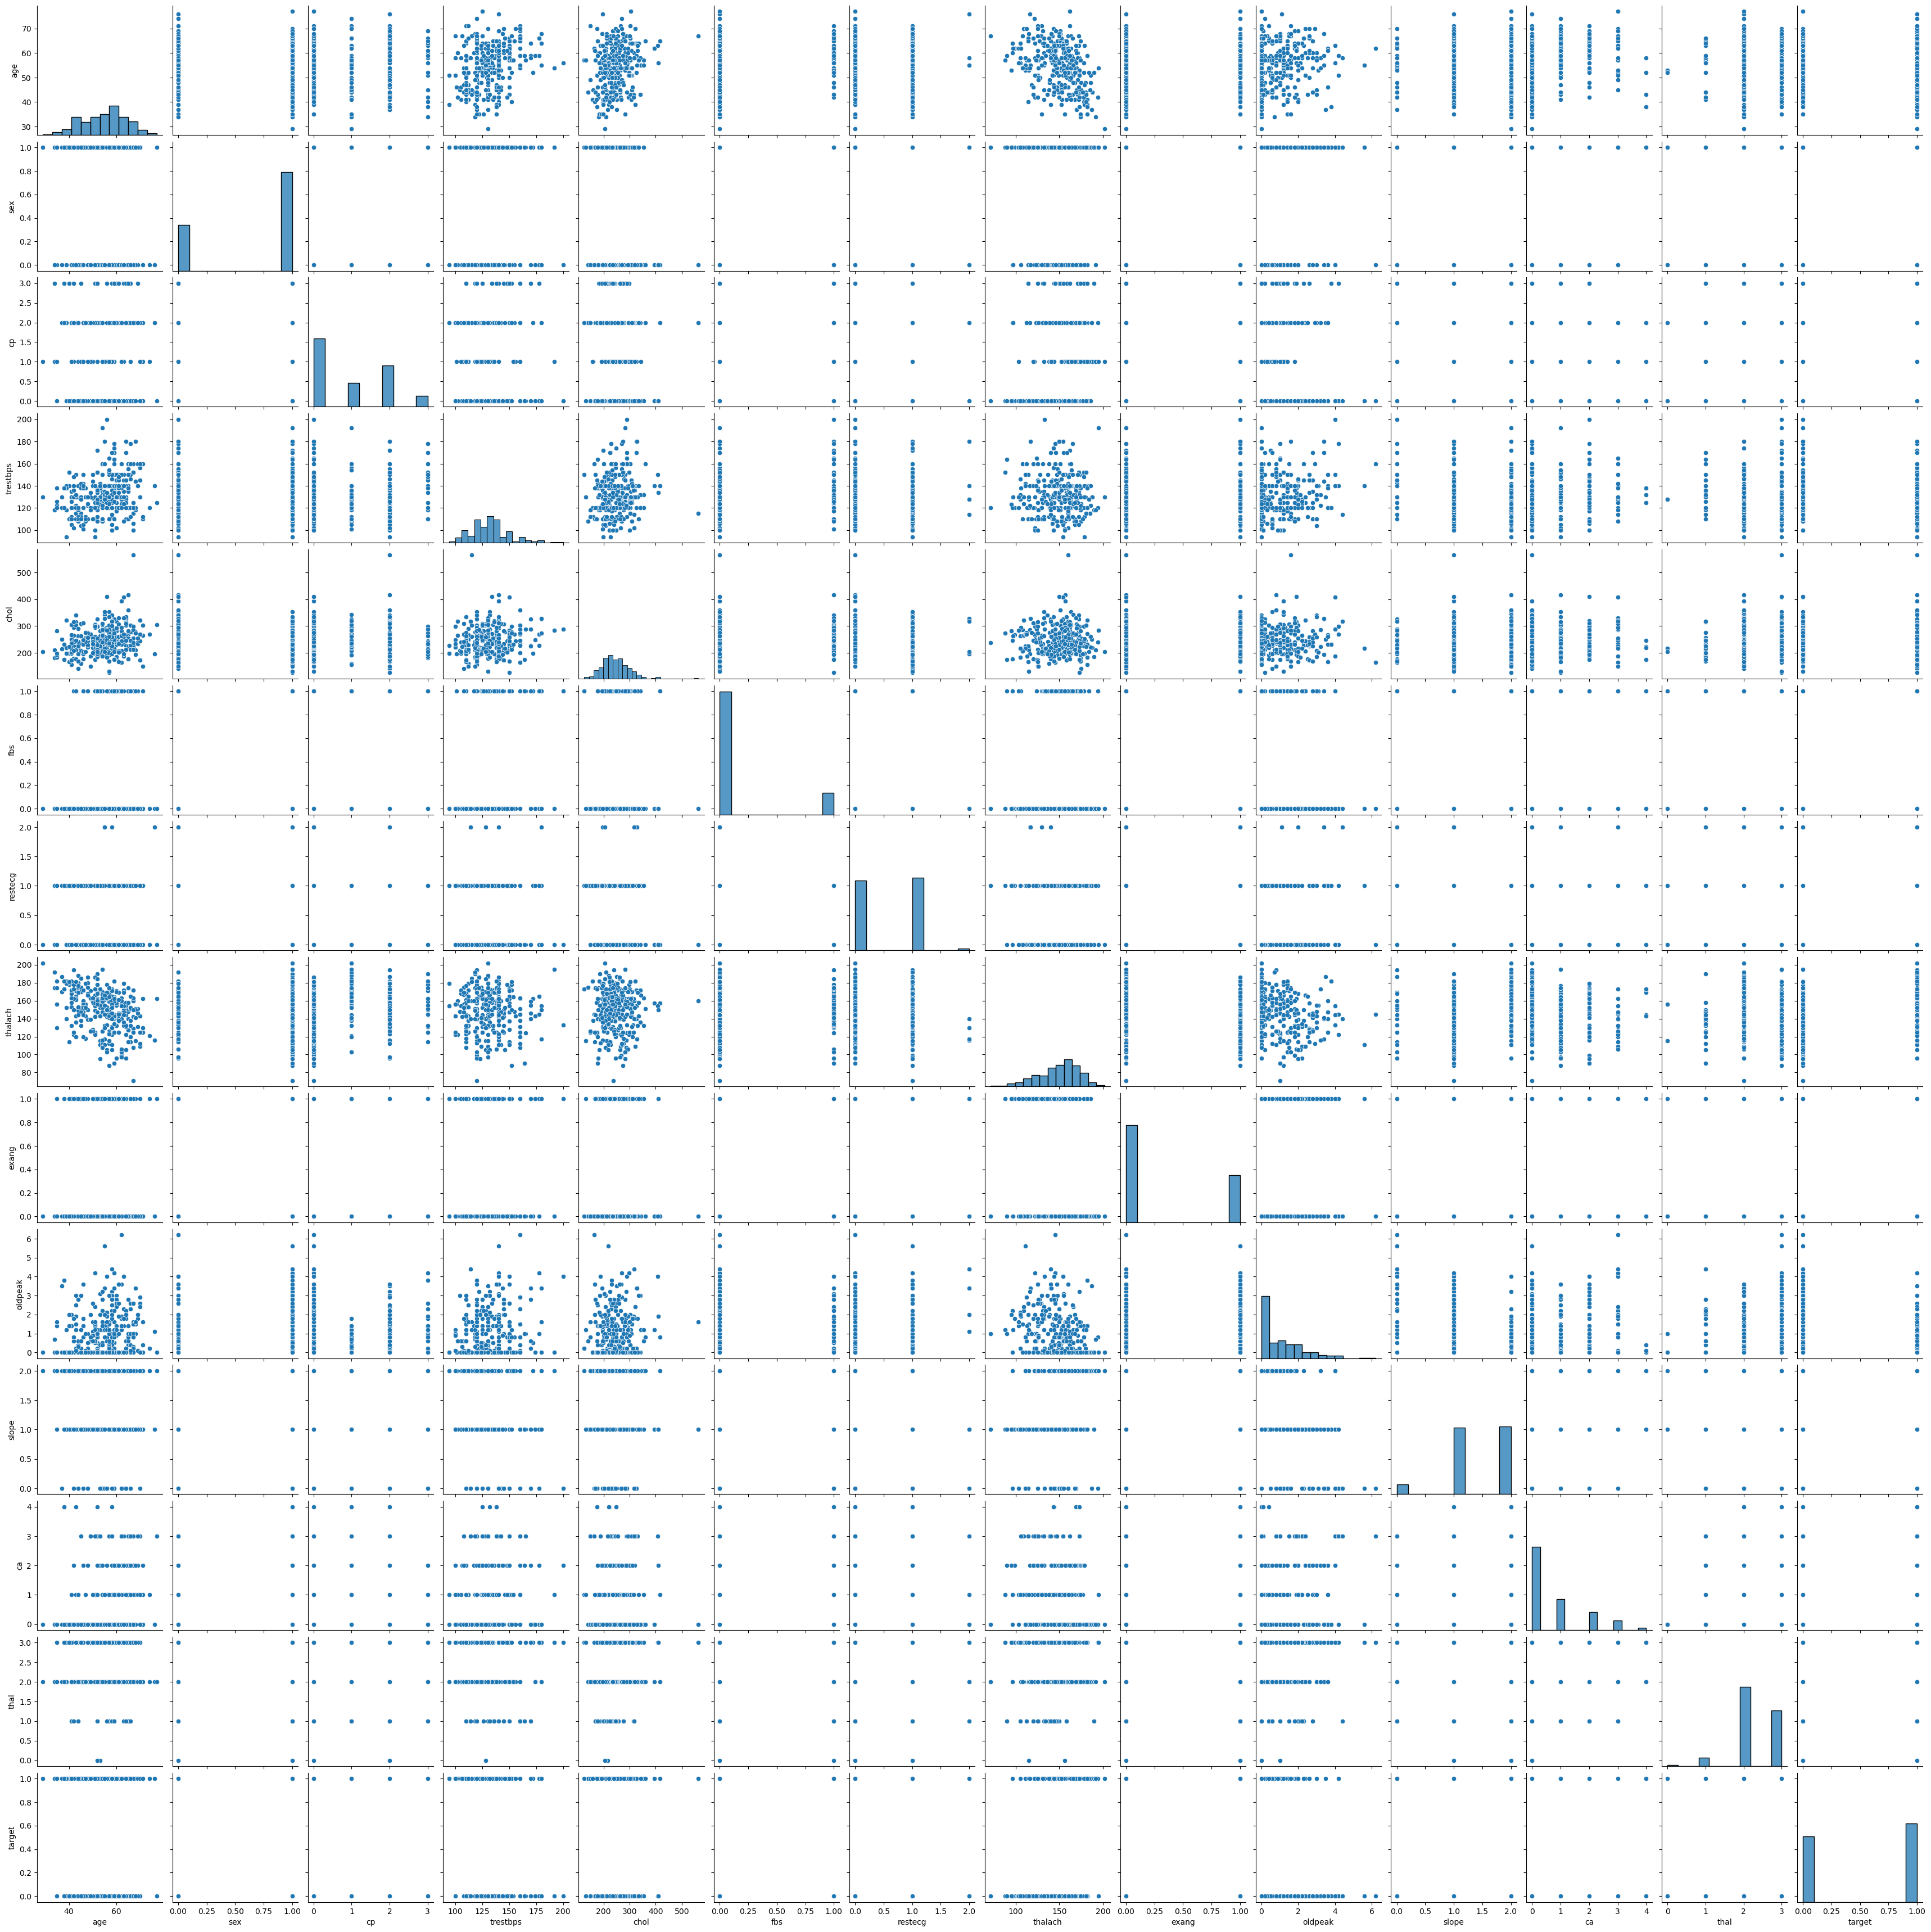

In [12]:
sns.pairplot(data=df)

In [13]:
# Took too much time as there are large number of features

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

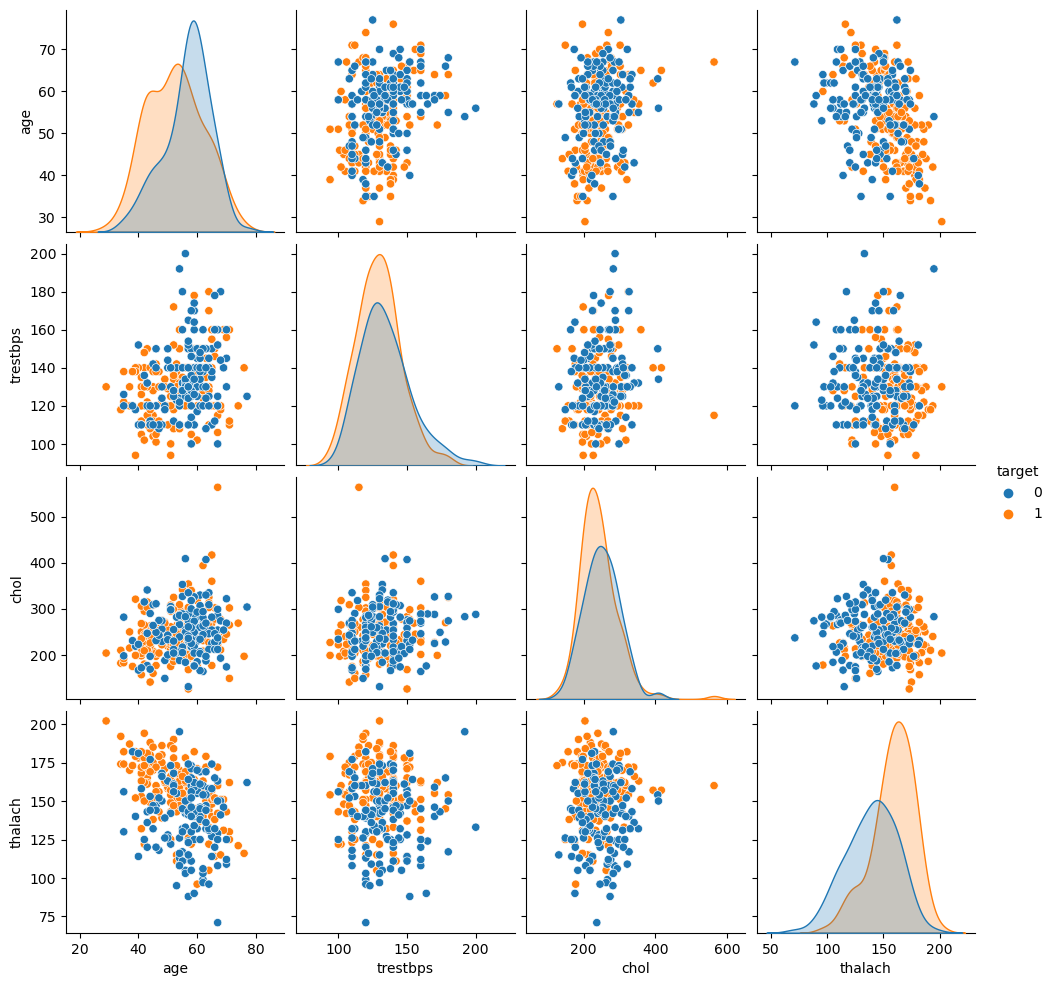

In [14]:
sns.pairplot(data = df[['age','trestbps', 'chol', 'thalach','target']],hue='target')

<Axes: >

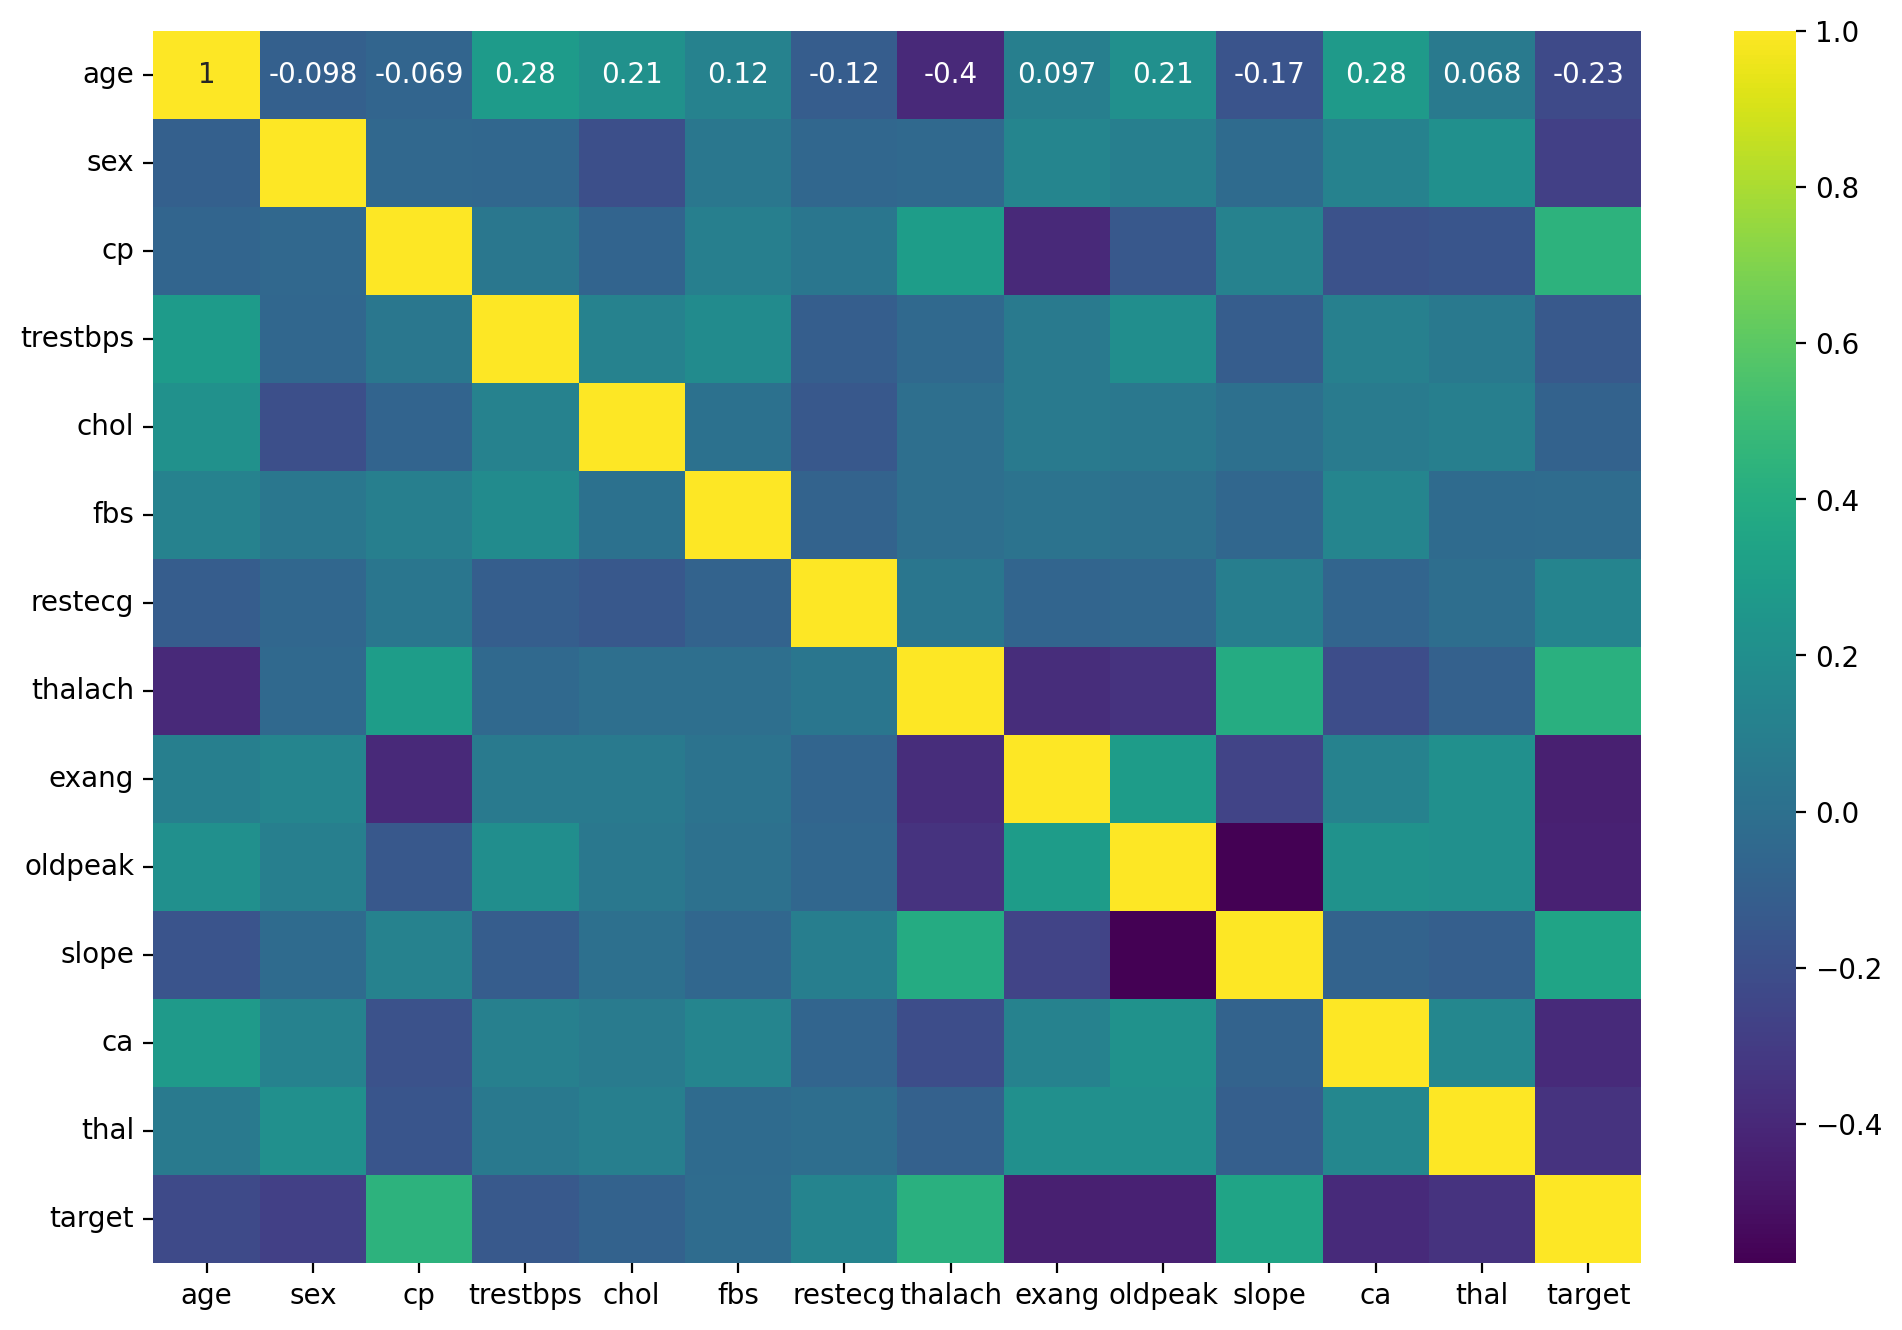

In [15]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [16]:
# Annotations not being displayed
# https://stackoverflow.com/questions/77165100/only-the-first-row-of-annotations-displayed-on-seaborn-heatmap

In [17]:
# Separating the data into X and y and Splitting the data into training and testing set.

In [18]:
X = df.drop('target',axis=1)
y = df['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
# 10% data taken as test data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegressionCV

In [26]:
help(LogisticRegressionCV)

Help on class LogisticRegressionCV in module sklearn.linear_model._logistic:

class LogisticRegressionCV(LogisticRegression, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.BaseEstimator)
 |  LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)
 |  
 |  Logistic Regression CV (aka logit, MaxEnt) classifier.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  This class implements logistic regression using liblinear, newton-cg, sag
 |  of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2
 |  regularization with primal formulation. The liblinear solver supports both
 |  L1 and L2 regularization, with a dual formulation only for the L2 penalty.
 |  Elastic-Net penalty is only supported by the saga solver.
 |  
 

In [27]:
# LogisticRegressionCV will explore different C values for penalty terms.
# By default, penalty is L2
# C=10 means check out 10 possible C values on a logarithmic scale between between 1e-4 and 1e4.
# 10 (the default) is a reasonable amount.

In [28]:
log_model = LogisticRegressionCV()

In [29]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [30]:
# What are search's optimal parameters

In [31]:
# All the Cs the model checked.
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [32]:
# The C value it decided on.
log_model.C_

array([0.04641589])

In [33]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [34]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [35]:
# Visualizing the coefficients.

In [36]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [37]:
coefs

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

<Axes: >

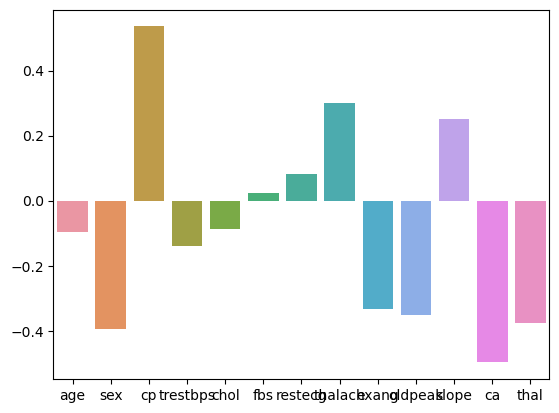

In [38]:
sns.barplot(x=coefs.index,y=coefs.values)

<Axes: >

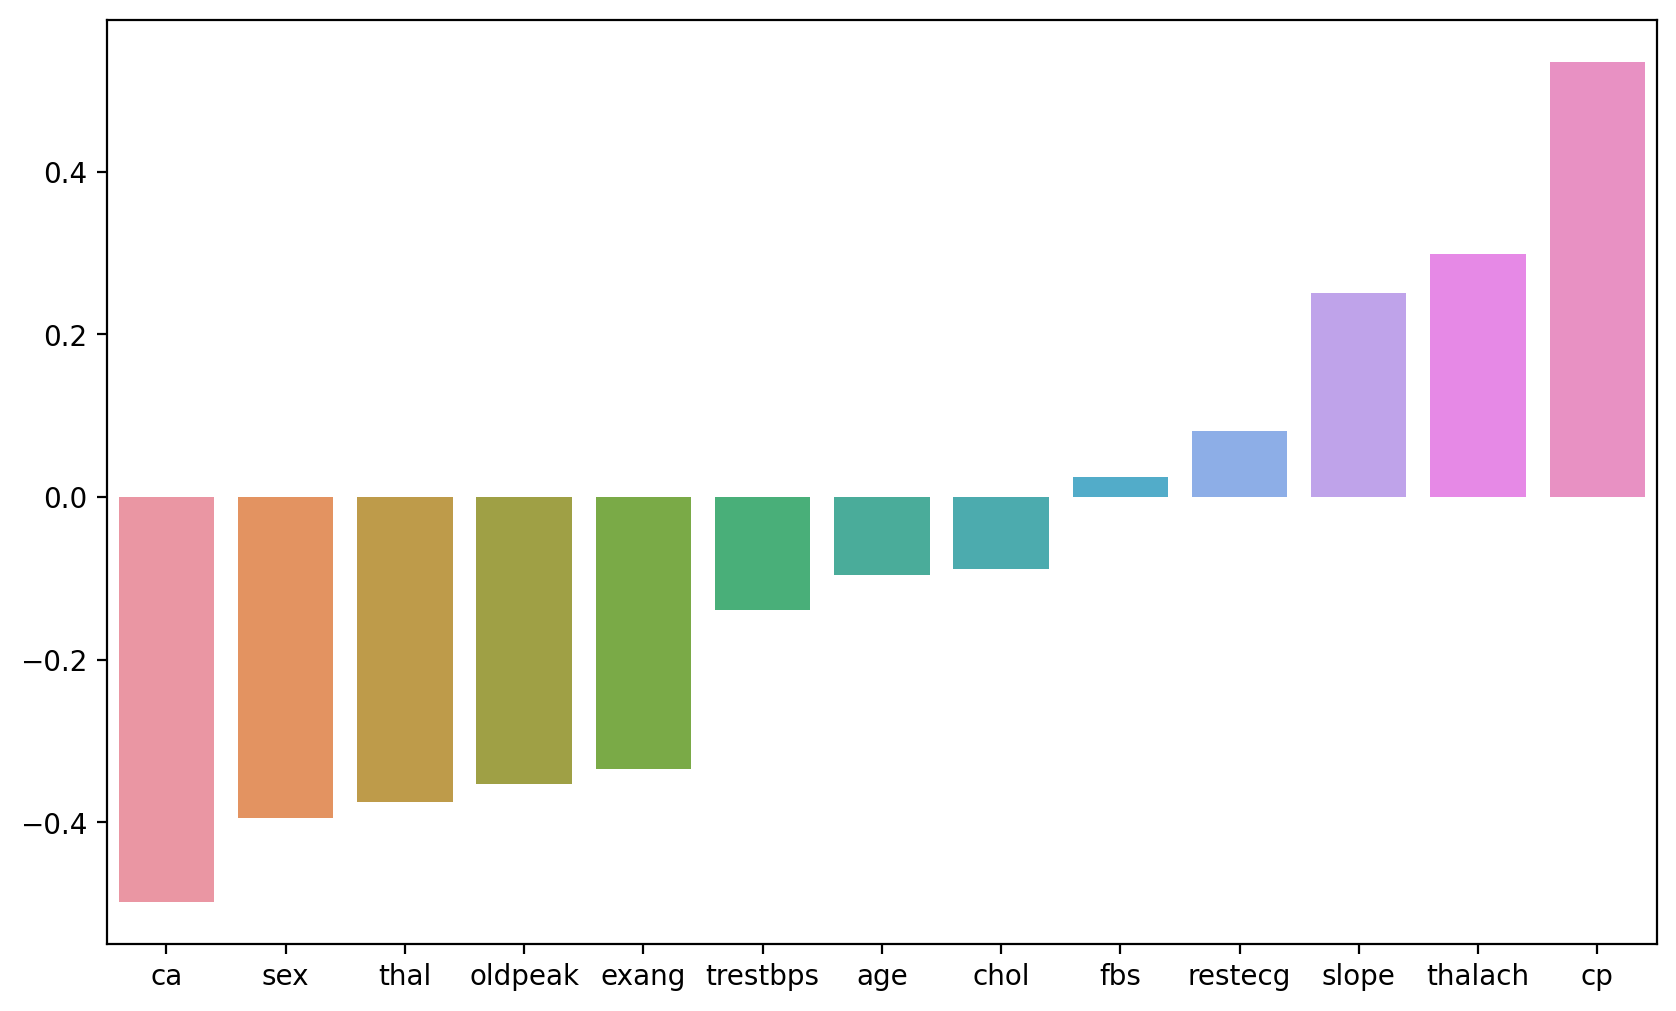

In [39]:
plt.figure(figsize=(10,6),dpi=200)

coefs = coefs.sort_values()

sns.barplot(x=coefs.index,y=coefs.values)

---------

## Model Performance Evaluation

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [41]:
y_pred = log_model.predict(scaled_X_test)

In [42]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [43]:
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

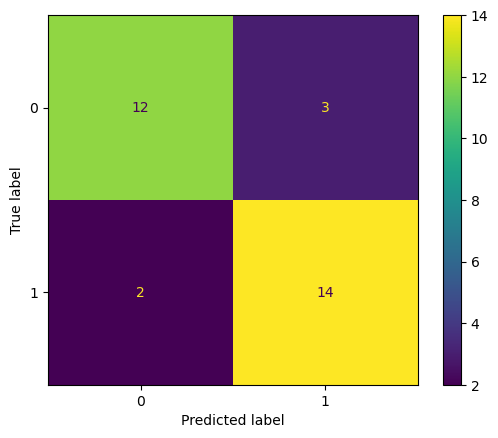

In [44]:
cm = confusion_matrix(y_test,y_pred,labels=log_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [46]:
# ~ 80% precision
# A wider grid search can be performed for improvements

In [47]:
# Creating precision recall curve and the ROC Curve

In [48]:
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay.from_predictions

In [49]:
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_roc_curve.html

In [50]:
from sklearn.metrics import PrecisionRecallDisplay

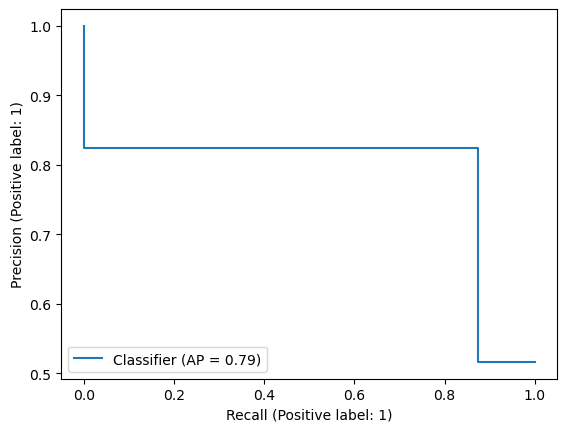

In [51]:
PrecisionRecallDisplay.from_predictions( y_test, y_pred)

plt.show()

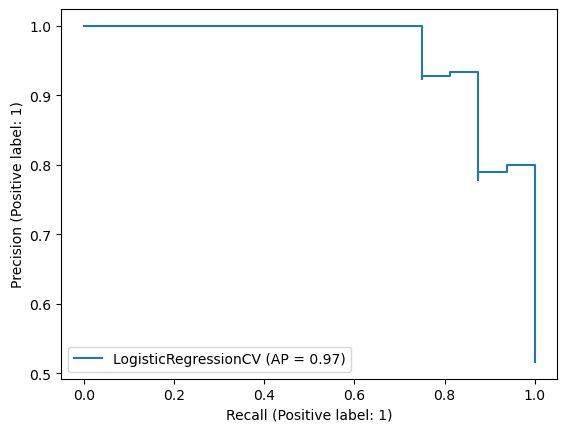

In [52]:
>>> PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

plt.show()

In [53]:
from sklearn.metrics import RocCurveDisplay

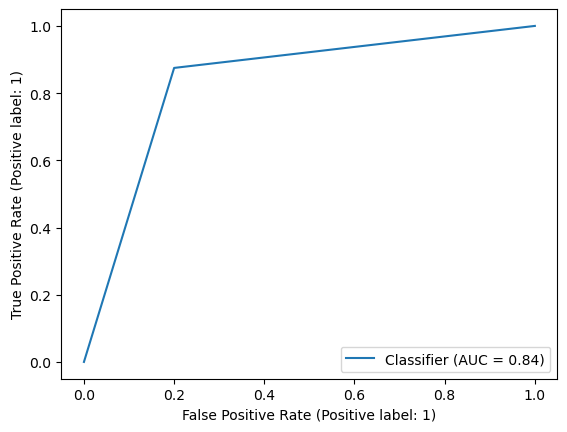

In [54]:
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

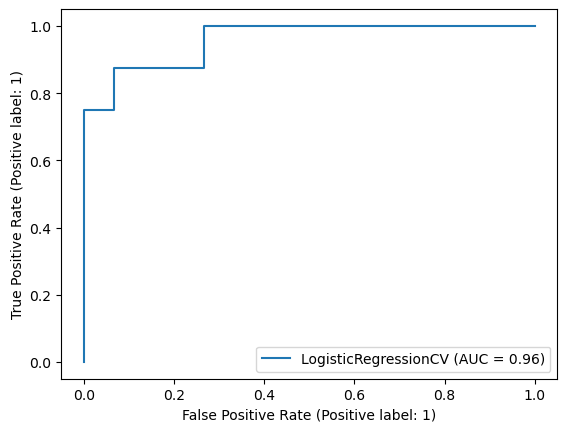

In [55]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

plt.show()

In [56]:
# Why curves drawn from_predictions differ from drawn from_estimator?

In [57]:
# From ChatGPT

# When using the estimator, the model refits itself on the input data X and calculates the predicted probabilities for the positive class. 
# This can introduce differences, especially if:
# 1. The estimator internally re-partitions the data or re-applies preprocessing.
# 2. There's randomness in the model fitting process (e.g., due to initialization or sampling).
# This method also assumes a "global" threshold-free approach, which means the curve is generated directly from the estimator's predicted probabilities.

In [58]:
# When you calculate the curve from predictions, you explicitly pass the ground truth labels y_test and the predicted probabilities y_pred. 
# The model isn't refitted, so the probabilities reflect what the model actually predicted when it was originally trained.
# This method is more reflective of the actual model output for the given test set.

In [59]:
# Why the curves differ?

# If the estimator refits the model on the same data (or with different random states), the learned parameters may change slightly,
# leading to different probabilities.

# If the input features or the data structure differ slightly between the two methods (e.g., normalization or missing values handled differently), 
# the output probabilities may also differ.

**Final Assessment: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**What does your model predict for this patient? Do they have heart disease? How "sure" is the model of this prediction?**

In [60]:
# created an array of the features for the patient above

patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

# Two sets of bracket
# model is trained on 2d data

In [61]:
# Ideally should retrain the model on ALL data.

In [62]:
# Here, using model as it is.

In [63]:
log_model.predict(patient)

array([0], dtype=int64)

In [64]:
# Predicted 0 class.

In [65]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])

In [66]:
# 99.99% sure that the patient belongs to 0 class.